*WRITE YOUR NAME HERE*


Introduction to Python and Astropy
![Astropy: A Community Python Library for Astronomy](http://www.astropy.org/images/astropy_banner_96.png)
========

***

The PDF plots of your astronomical object are due on Monday, September 19.

In [1]:
# You'll want these three lines in EVERY notebook you ever use.
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Astropy

Astropy is a core Python package for astronomy. It is formed from the merger of a number of other Python astronomy packages, but also contains a lot of original code. Core features include:

* `astropy.constants`, `astropy.units`: Physical constants, units, and unit conversion
* `astropy.time`: Manipulation of dates and times
* `astropy.coordinates`: Representation of and conversion between astronomical coordinate systems
* `astropy.table`: Tables and gridded data
* `astropy.io.fits`: Manipulating FITS files
* `astropy.io.ascii`: Manipulating ASCII tables of many different formats
* `astropy.io.votable`: Virtual Observatory tables
* `astropy.wcs`: World Coordinate System transformations
* `astropy.cosmology`: Cosmological calculations
* `astropy.stats`: Astrostatistics
* `astropy.modeling`: multi-D model fitting Swiss army knife

The Astropy project also has several ["affiliated packages"](http://www.astropy.org/affiliated/index.html) that have similar design but are maintained separately, including:

* [APLPy](http://aplpy.github.io): High-level astronomical map making with Matplotlib
* [WCSAxes](http://wcsaxes.readthedocs.org/): Nuts-and-bolts astronomical mapmaking for Matplotlib experts
* [Photutils](http://photutils.readthedocs.org/en/latest/): Aperture photometry
* [Astroquery](http://astroquery.readthedocs.org/en/latest/): Query astronomical databases

Let's experiment by opening up a P48 image. We'll need several modules from the Astropy package for this exercise.

In [ ]:
import astropy.coordinates as coords
import astropy.units as u
import astropy.io.fits
import astropy.stats
import astropy.table
import astropy.wcs

We just have time to scratch the surface of what astropy is capable of.  `astropy.constants` and `astropy.units` are both quite useful:

In [ ]:
import astropy.constants as const
import astropy.units as u

const.c

Unit conversion is as simple as adding `.to(unit)`:

In [ ]:
const.c.to('AU/year')

### Exercise 1

Use astropy.constants to calculate the mean density of Earth in g/cm^3.

# FITS files

FITS ("Flexible Image Transport System") has been the standard for astronomical data since 1981. It's age shows a bit, but it's important to have an archival standard. FITS files can be both images or tables of data. For our purposes we'll only be dealing with image files.

Let's work with an example FITS image.

In [22]:
# Dr. Hewitt's favorite astronomical object is the supernova remnant Westerlund 44 
# or W44 for short; the 44th source in the catalog of Westerlund. The data is from
# the NASA's WISE infrared survey telescope.
import astropy
image_filename = 'skv8510864302065_2.fits'
hdulist = astropy.io.fits.open(image_filename)
hdulist

We want to select the first HDU ("header data unit") of this FITS file (there's only one in this case, but there could be more):

In [23]:
hdu = hdulist[0]

Then let's take a look at the contents of the header:

In [24]:
hdu.header

VerifyError: 
Verification reported errors:
Unfixable error: Unprintable string 'Reference:   PASP 121, 1180, 2009          \tSurvey web site.'; commentary cards may only contain printable ASCII characters
Note: PyFITS uses zero-based indexing.


There's a lot of information in there! The header contains many keywords which encode important astronomical information about the image. This image has two axes, each of length 300 pixels. The size and location of each pixel is defined by the "World Coordinate System" (WCS) described in the header by the following keywords:
<code>
RADESYS = 'FK5     '           / Coordinate system                              
EQUINOX =               2000.0 / Epoch of the equinox                           
CTYPE1  = 'RA---TAN'           / Coordinates -- projection                      
CTYPE2  = 'DEC--TAN'           / Coordinates -- projection                      
CRPIX1  =                150.5 / X reference pixel                              
CRPIX2  =                150.5 / Y reference pixel                              
CDELT1  = -0.002666666666666667 / X scale                                       
CDELT2  = 0.002666666666666667 / Y scale                                        
</code>

Don't pay much mind to the tangent projection. Over these small distances it doesn't matter much which projection of the sky you use. (Though if map projections is your thing, see [here](https://xkcd.com/977/).)

### Exercise 2

The size of each pixel is given in degrees by the keyword <code>CDELT</code>. What is the size of a single pixel in arcseconds?

Now let's plot the image data.

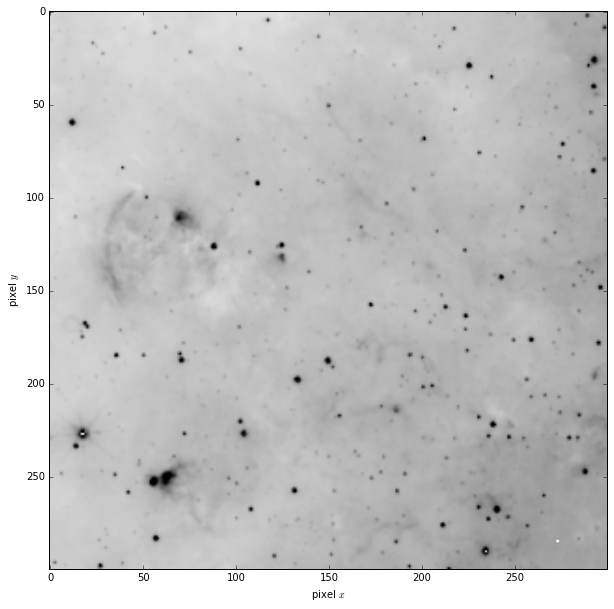

In [17]:
plt.figure(figsize=(20, 10))
plt.imshow(hdu.data, vmin=500, vmax=3000, cmap='binary')
plt.xlabel('pixel $x$')
plt.ylabel('pixel $y$')

The image scaling isn't too bad, but we'd much rather see the image in astronomical coordinates than pixels. There are two ways you can do this. The *hard* way is to map the pixel coordinates onto the "World Coordinate System" (WCS) described in the header by the following keywords:

<code>CTYPE1  = 'GLON-SIN'           /                                                
CRVAL1  =        27.0000000000 /                                                
CDELT1  =   -0.000555556000000 /                                                
CRPIX1  =        3065.50000000 /                                                
CROTA1  =       -0.00000000000 /                                                
CTYPE2  = 'GLAT-SIN'           /                                                
CRVAL2  =        0.00000000000 /                                                
CDELT2  =          0.000555556 /                                                
CRPIX2  =        330.500000000 /                                                
CROTA2  =       -0.00000000000 /
</code>

The *easy* way is to use a python module that will do this for you! The one I am most familiar with, and that I recommend using in this course is [APLpy](https://aplpy.github.io/). It's already installed, so all we have to do is import the python module.

In [ ]:
import aplpy

/usr/lib64/python3.4/site-packages/matplotlib/artist.py:224: MatplotlibDeprecationWarning: get_axes has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  stacklevel=1)


INFO: Auto-setting vmin to  6.523e+02 [aplpy.core]
INFO: Auto-setting vmax to  2.783e+03 [aplpy.core]


/usr/lib/python3.4/site-packages/aplpy/normalize.py:115: RuntimeWarning: invalid value encountered in less
  negative = result < 0.


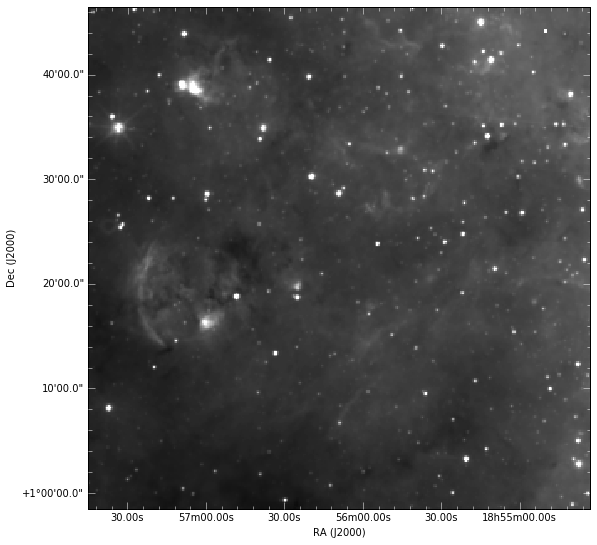

In [21]:
gc = aplpy.FITSFigure(image_filename)
gc.show_grayscale()
# ignore errors if it works!

That was easy! Note that the supernova remnant is located at the center of the image, but is a bit difficult to see because of the surrounding star forming regions and diffuse interstellar clouds. It has coordinates $\alpha_\mathrm{J2000}, \delta_\mathrm{J2000} = (18:56, +01:22)$ and is ~0.6 degrees in diameter. 

Let's put a circle around it, so that we can see it better, and while we're at it, let's try a color image instead of greyscale.

/usr/lib64/python3.4/site-packages/matplotlib/artist.py:224: MatplotlibDeprecationWarning: get_axes has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  stacklevel=1)
/usr/lib/python3.4/site-packages/aplpy/normalize.py:115: RuntimeWarning: invalid value encountered in less
  negative = result < 0.


INFO: Auto-setting vmin to  6.523e+02 [aplpy.core]
INFO: Auto-setting vmax to  2.783e+03 [aplpy.core]


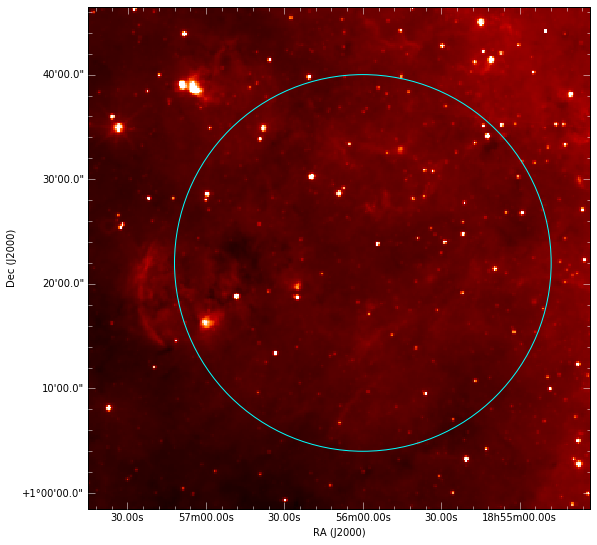

In [22]:
# Note we have to re-initialize the image
img = aplpy.FITSFigure(image_filename)

# define coordinates and overplot circle.
ra = 284.0000
dec = 1.36667
radius = 0.3
img.show_circles(ra,dec,radius,color='cyan')

# use the GIST_HEAT color map
img.show_colorscale(cmap='gist_heat')

Generally, supernova remnants are easiest to see at radio wavelengths. W44 is a diffuse shell of relativistic electrons swept up by the blast wave of a stellar explosion that happened ~10,000 years ago which are still emitting radio waves through  synchrotron radiation.

It's still quite hard to see the supernova remnant. Let's make an image of the radio data, and while we're at it, change the coordinate label format, plot contours of the radio image, and add some labels and a grid.

/usr/lib64/python3.4/site-packages/matplotlib/artist.py:224: MatplotlibDeprecationWarning: get_axes has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  stacklevel=1)


INFO: Auto-setting vmin to -1.981e+00 [aplpy.core]
INFO: Auto-setting vmax to  3.847e+00 [aplpy.core]


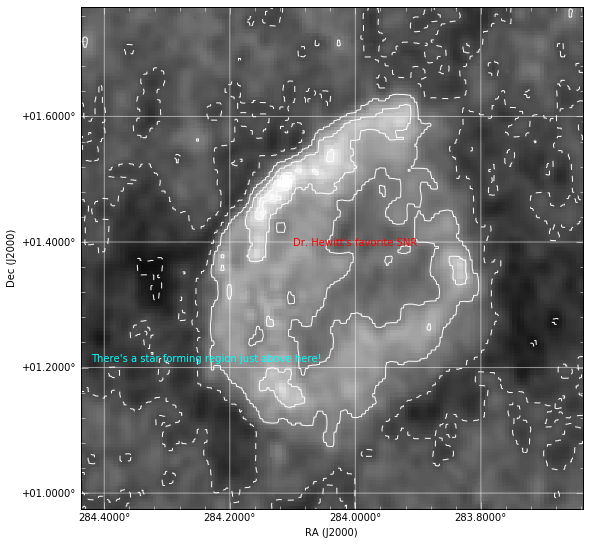

In [36]:
fig = aplpy.FITSFigure('W44_VLA74MHz.fits')

# to change coordinate format, see also note below
fig.tick_labels.set_xformat('dd.dddd')
fig.tick_labels.set_yformat('dd.dddd')

#We can also add contours of the radio image (or any other image)
# note that it will auto-magically pick contour levels for us
# you can also set the levels yourself if you know what you'd like.
fig.show_contour('W44_VLA74MHz.fits', colors='white')

#Labels can be added either in world coordinates:
fig.add_label(284.0,1.4, "Dr. Hewitt's favorite SNR", color="red")
#or relative to the axes:
fig.add_label(0.25, 0.3, "There's a star forming region just above here!", relative=True, color="cyan")

# to add a gride
fig.add_grid()


fig.show_grayscale()

There are two methods are provided to help transform coordinates between world and pixel coordinates. These accept 
either scalars or arrays in degrees:

In [34]:
# to change from RA,Dec. to pixels
x_pix, y_pix = fig.world2pixel(284.0,1.4)
print ("x,y = ",x_pix, y_pix)

# to change from pixel coordinates to WCS
x_world, y_world = fig.pixel2world(np.array([1., 2., 3]), np.array([1., 3., 5.]))
print ("RA,Dec = ",x_world,y_world)

x,y =  164.558305544 159.875112997
RA,Dec =  [ 284.43620847  284.43354249  284.4308765 ] [ 0.97631613  0.9816494   0.98698267]


### A note about label formatting
How label formats are specified depends on the coordinate type. If the coordinate is a longitude or latitude, then the label format is specified using a special syntax which describes whether the label should be decimal or sexagesimal, in hours or degrees, and indicates the number of decimal places. For example:

<ul>
<li>ddd.ddddd means decimal degrees, where the number of decimal places can be varied
<li>hh or dd means hours (or degrees)
<li>hh:mm or dd:mm means hours and minutes (or degrees and arcminutes)
<li>hh:mm:ss or dd:mm:ss means hours, minutes, and seconds (or degrees, arcminutes, and arcseconds)
<li>hh:mm:ss.ss or dd:mm:ss.ss means hours, minutes, and seconds (or degrees, arcminutes, and arcseconds), where the number of decimal places can be varied.
</ul>

If the coordinate type is scalar, then the format should be specified as a valid Python format. For example, %g is the default Python format, %10.3f means decimal notation with three decimal places, etc. For more information, see String Formatting Operations.

In both cases, the default label format can be overridden:
<code>
f.tick_labels.set_xformat('dd.ddddd')
f.tick_labels.set_yformat('%11.3f')
</code>

### Exercise 3

It's possible to re-center and zoom in on a particular part of the image. Using the WISE 22 micron image, zoom in on the star forming region. NASA has a [handy coordinate converter on the web](https://heasarc.gsfc.nasa.gov/cgi-bin/Tools/convcoord/convcoord.pl). You will have to decide the proper x and y pixel coordinates.

In [26]:
import aplpy
fig = aplpy.FITSFigure('skv8510864302065_2.fits')
fit.show_grayscale()

OSError: An error occurred while reading the FITS file

### Exercise 4

To get familiar with making plots of FITS files, I'd like you to download a 300 by 300 pixel image of your favorite celestial object using SkyView.

http://skyview.gsfc.nasa.gov/current/cgi/query.pl

You will need to know the coordinates, a rough guess at the size of the object (choose an image size slightly larger so it fits), and at which wavelenghts it is visible.

Once you've downloaded the FITS file, upload it to jupyter using the "upload" button on the top right of the homescreen that you see once you've logged in. Make sure to put it in the folder "02_FITSfiles" so that you can access it from this notebook.

Finally, use your image and APLpy to make a plot in equatorial (R.A., Dec.) coordinates. Be sure to title your plot and write a caption describing what is shown (source name, wavelength, etc.) in plot you have made. Documentation on APLpy can be found at: [aplpy.readthedocs.io](http://aplpy.readthedocs.io/en/stable/#)

Figure 1. Caption for your plot goes here.

In [ ]:
# code to generate your plot goes here